In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [ ]:
df = pd.read_csv('bank_credit_clean.csv')
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [ ]:
selected_cols = ["Age","Credit amount", "Duration"]
cluster_data = df.loc[:, selected_cols]

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

def _3d_data_plot(data, labels=None):
    """Wrapper for 3D data plot

    Parameters:
        data: pandas dataframe
        labels: labels of the data points(if available)

    """
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111, projection='3d')

    g = ax.scatter(data["Credit amount"], data["Duration"], data["Age"], c=labels if labels is not None else 'black', cmap='rainbow')
    ax.set_xlabel("Credit amount")
    ax.set_ylabel("Duration")
    ax.set_zlabel("Age")
    plt.tight_layout()


def scatter_plot(data, hue=None):
    """Wrapper for seaborn scatter plot.

    Parameters:
        data: pandas dataframe
        hue: variable to distinguish data w.r.t(optional)
        palette: color palette(optional)

    """
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))

    sns.scatterplot(x="Credit amount",y="Duration", hue=hue, data=data, ax=ax1, palette='rainbow')
    sns.scatterplot(x="Age",y="Credit amount", hue=hue, data=data, ax=ax2, palette='rainbow')
    sns.scatterplot(x="Age",y="Duration", hue=hue, data=data, ax=ax3, palette='rainbow')

    plt.tight_layout()

def box_plot(df):
    """Wrapper for box ploting

    Parameters:
        df: pandas dataframe
    """

    fig, ax = plt.subplots(1,3,figsize=(20,5))
    sns.boxplot(df['Credit amount'], ax=ax[0])
    sns.boxplot(df['Duration'], ax=ax[1])
    sns.boxplot(df['Age'], ax=ax[2])
    plt.tight_layout()

def distributions_plot(df):
    """Wrapper for ploting data distributions

    Parameters:
        df: pandas dataframe
    """
    fig, ax = plt.subplots(1, 3, figsize=(20,5))
    sns.distplot(df["Age"], ax=ax[0])
    sns.distplot(df["Credit amount"], ax=ax[1])
    sns.distplot(df["Duration"], ax=ax[2])
    plt.tight_layout()



/tmp/ipython-input-5-2067447677.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  g = ax.scatter(data["Credit amount"], data["Duration"], data["Age"], c=labels if labels is not None else 'black', cmap='rainbow')
/tmp/ipython-input-5-2067447677.py:58: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"], ax=ax[0])
/tmp/ipython-input-5-2067447677.py:59: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms

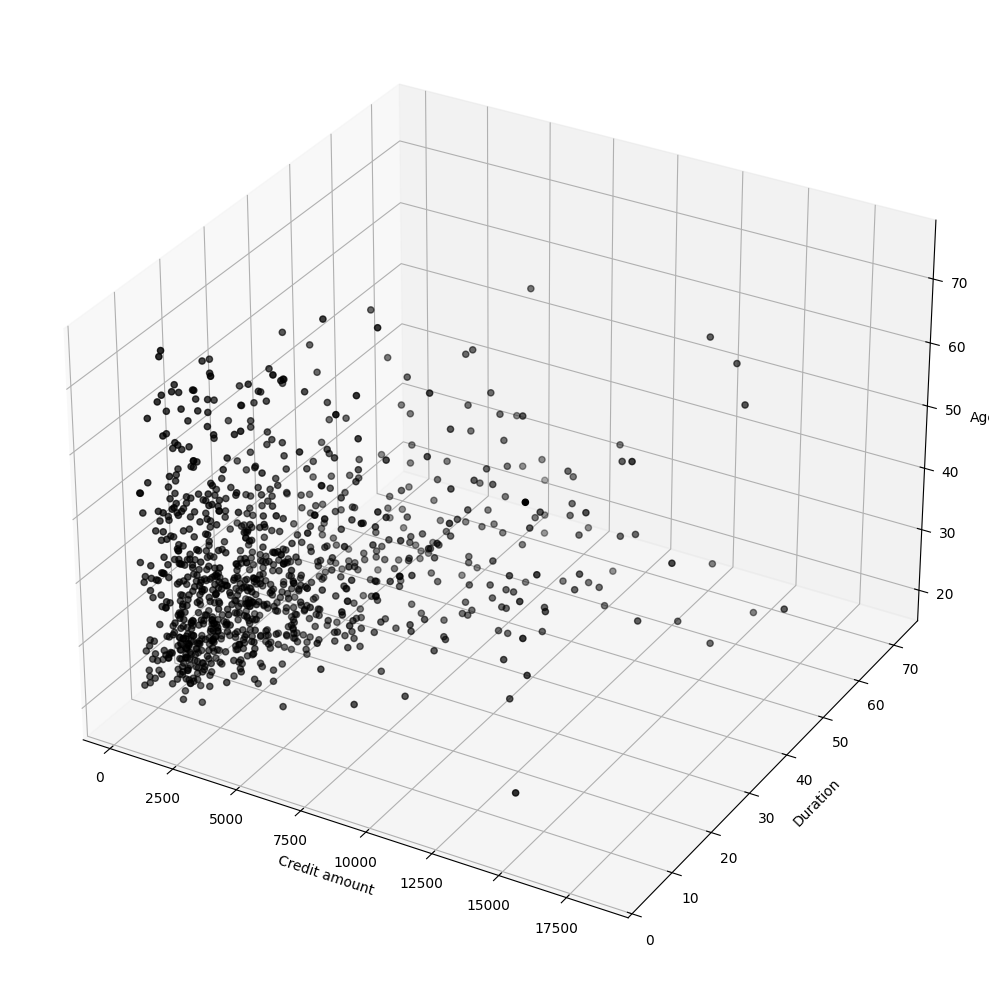

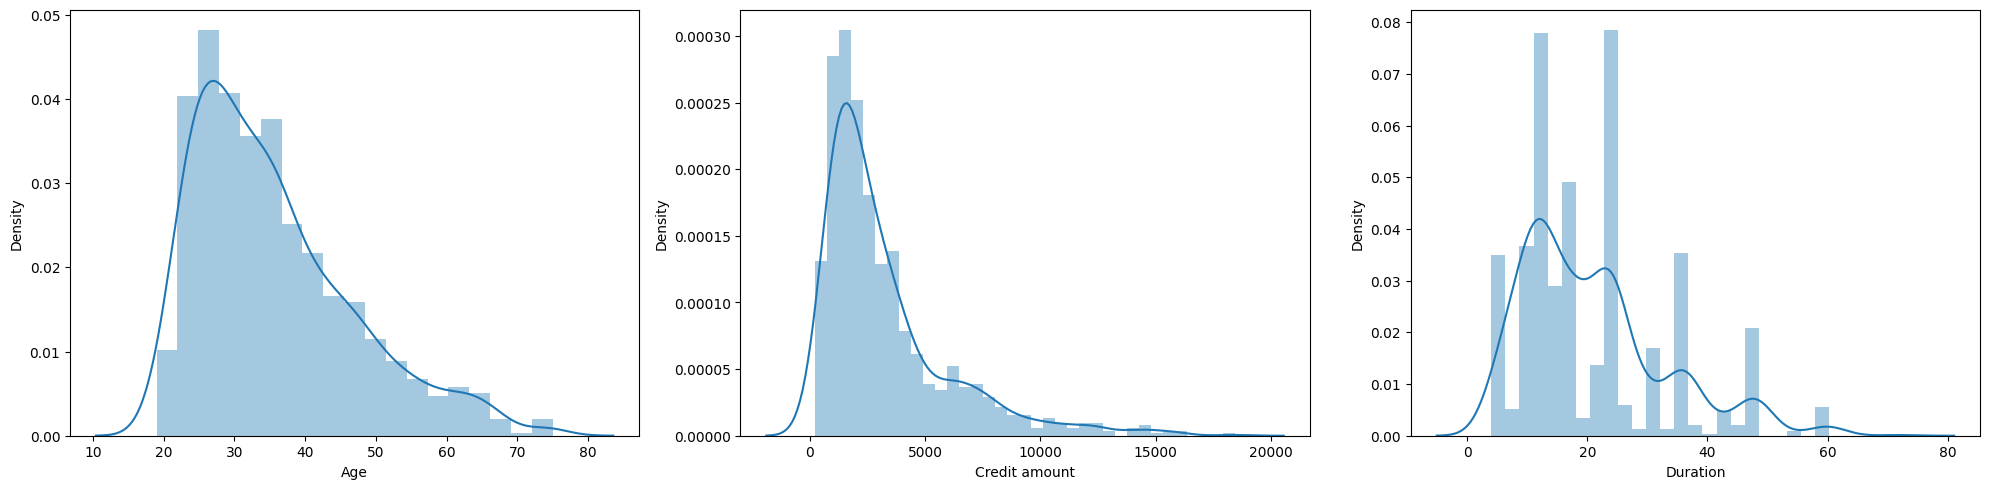

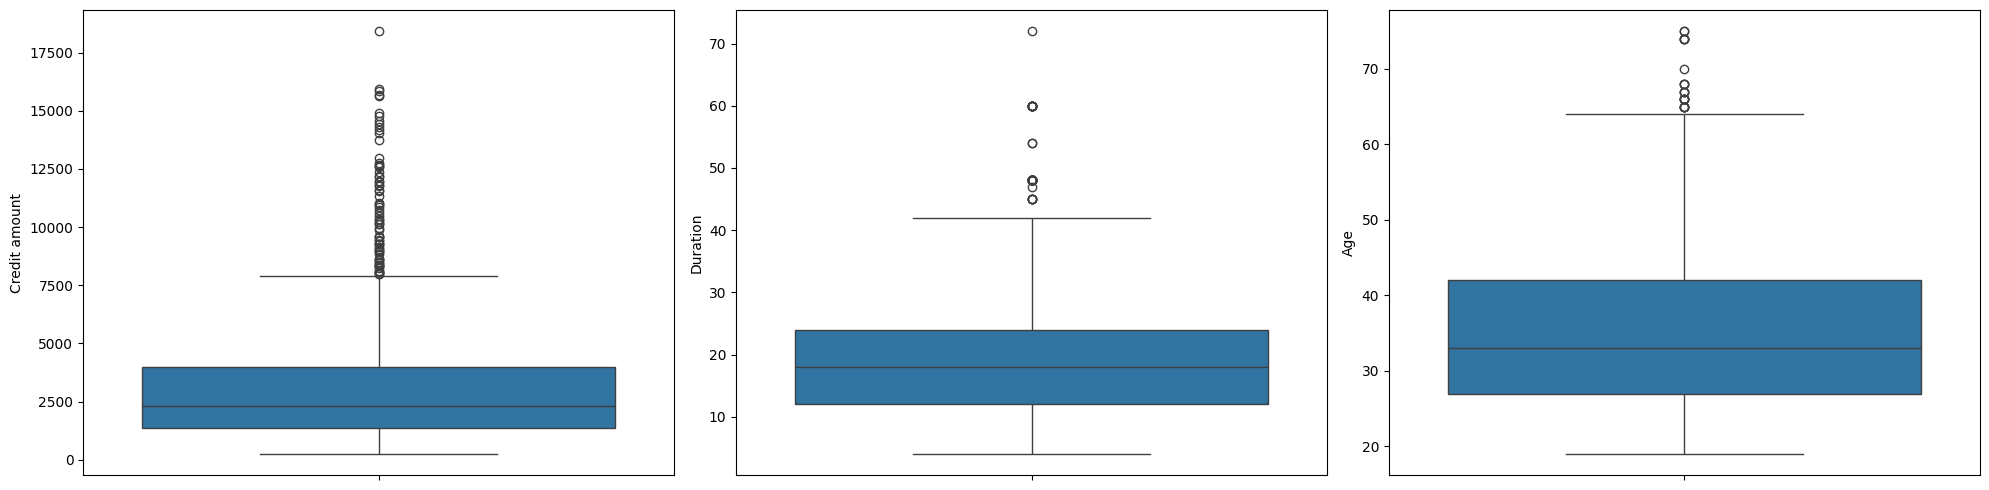

In [ ]:
## Plots
_3d_data_plot(cluster_data)
distributions_plot(cluster_data)
box_plot(cluster_data)

/tmp/ipython-input-5-2067447677.py:58: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"], ax=ax[0])
/tmp/ipython-input-5-2067447677.py:59: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Credit amount"], ax=ax[1])
/tmp/ipython-input-5-2067447677.py:60: UserWarning: 

`distplot` is a depr

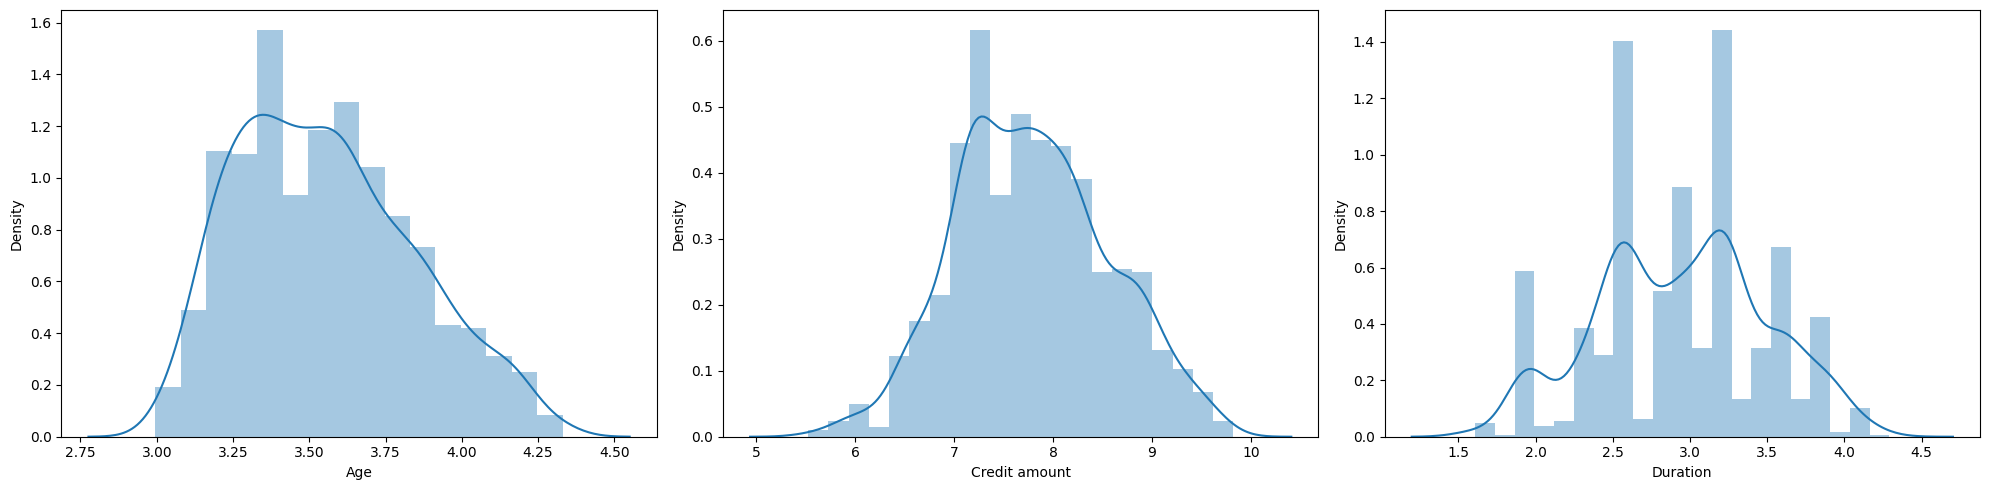

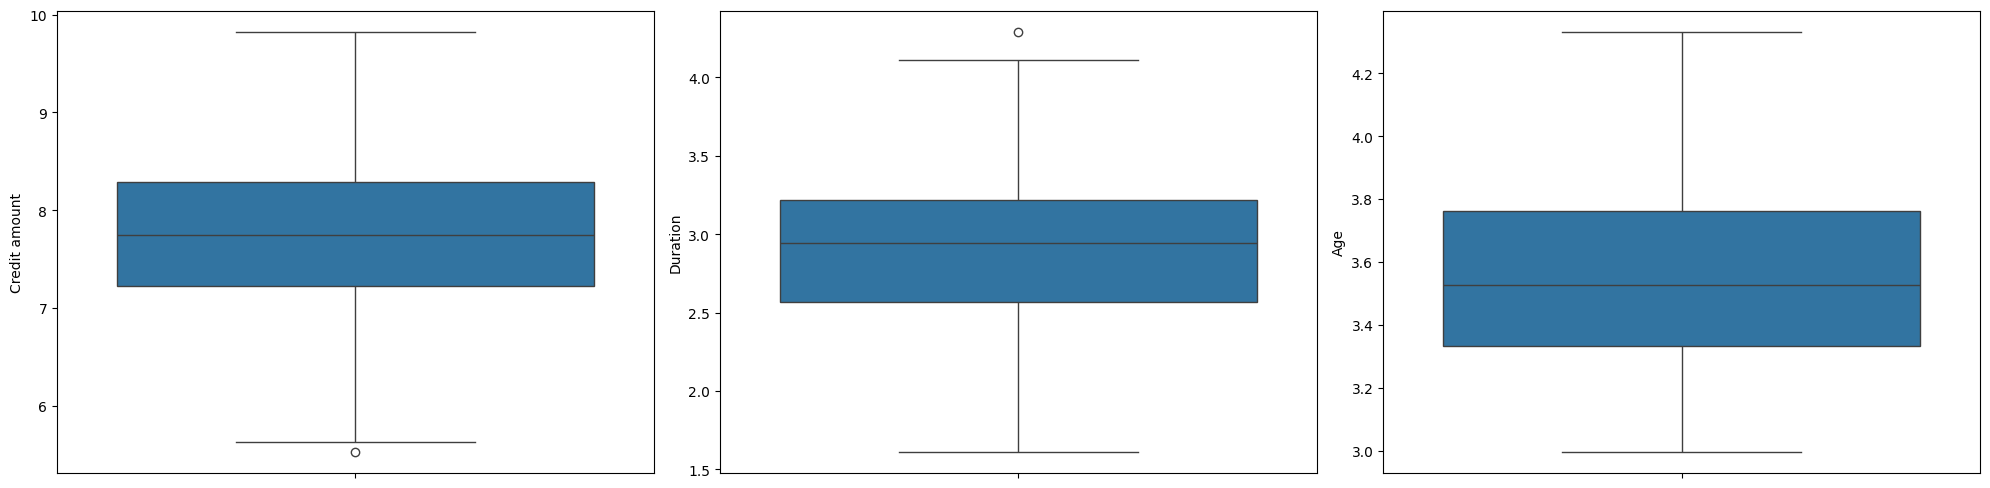

In [ ]:

skew_fix_data = None



skew_fix_data = cluster_data.copy()
skew_fix_data["Credit amount"] = np.log1p(skew_fix_data["Credit amount"])
skew_fix_data["Duration"] = np.log1p(skew_fix_data["Duration"])
skew_fix_data["Age"] = np.log1p(skew_fix_data["Age"])


distributions_plot(skew_fix_data)
box_plot(skew_fix_data)

In [ ]:
assert skew_fix_data is not None, 'Invalid data'

In [ ]:

scaler = None
scaled_data = None


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(skew_fix_data),
                          columns=skew_fix_data.columns)



In [ ]:
scaled_data.mean(), scaled_data.var()

(Age              1.634248e-16
 Credit amount    4.156675e-16
 Duration         3.588241e-16
 dtype: float64,
 Age              1.001001
 Credit amount    1.001001
 Duration         1.001001
 dtype: float64)

In [ ]:
assert scaled_data is not None

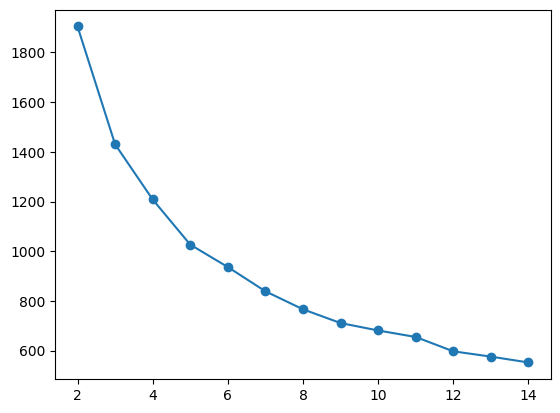

In [ ]:

clusters_range = None
inertias = []
kmeans = None


from sklearn.cluster import KMeans
clusters_range = range(2, 15)
inertias = []
for k in clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)



plt.plot(clusters_range, inertias, marker='o')
plt.show()

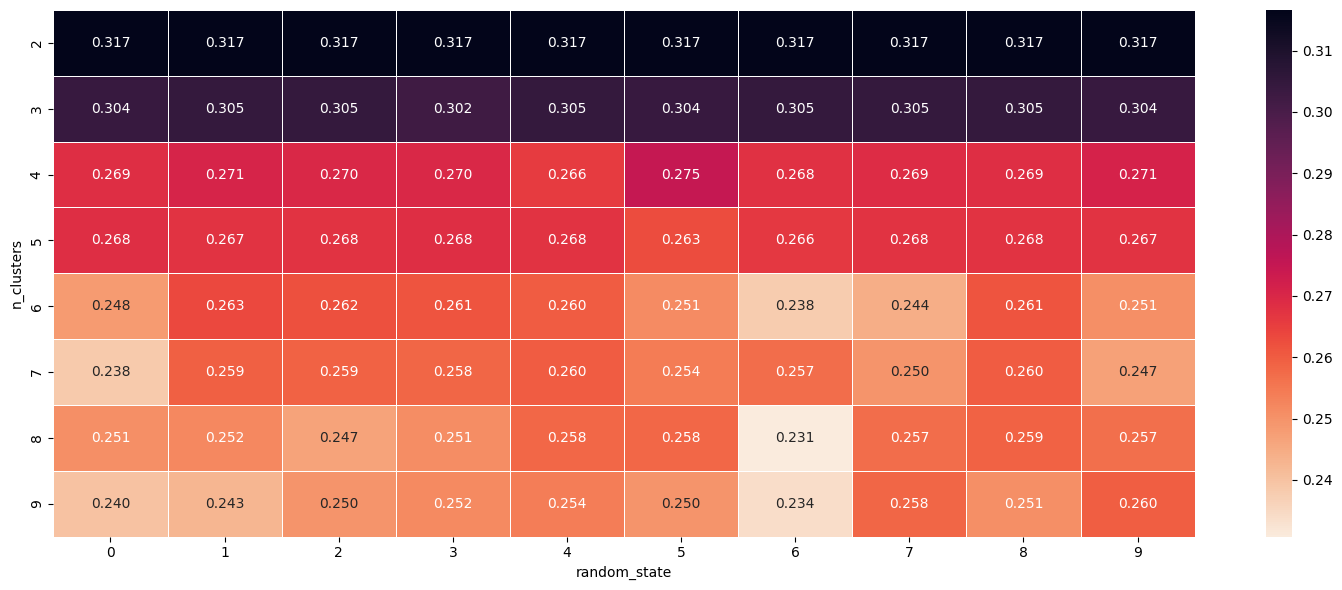

In [ ]:
### Ex-2-Task-2
from sklearn.metrics import silhouette_score

clusters_range = None #
random_range = None
results = []
clusters_range = range(2, 10)
random_range = range(0, 10)
results = []

for k in clusters_range:
    for seed in random_range:
        kmeans = KMeans(n_clusters=k, random_state=seed)
        labels = kmeans.fit_predict(scaled_data)
        score = silhouette_score(scaled_data, labels)
        results.append([k, seed, score])


result = pd.DataFrame(results, columns=["n_clusters","random_state","silhouette_score"])
pivot_km = pd.pivot_table(result, index="n_clusters", columns="random_state", values="silhouette_score")


plt.figure(figsize=(15,6))
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

In [ ]:
#
final_kmeans = None
labels = None


final_kmeans = KMeans(n_clusters=3, random_state=1)
final_kmeans.fit(scaled_data)
labels = final_kmeans.labels_


clustered_data = cluster_data.assign(Cluster=labels)

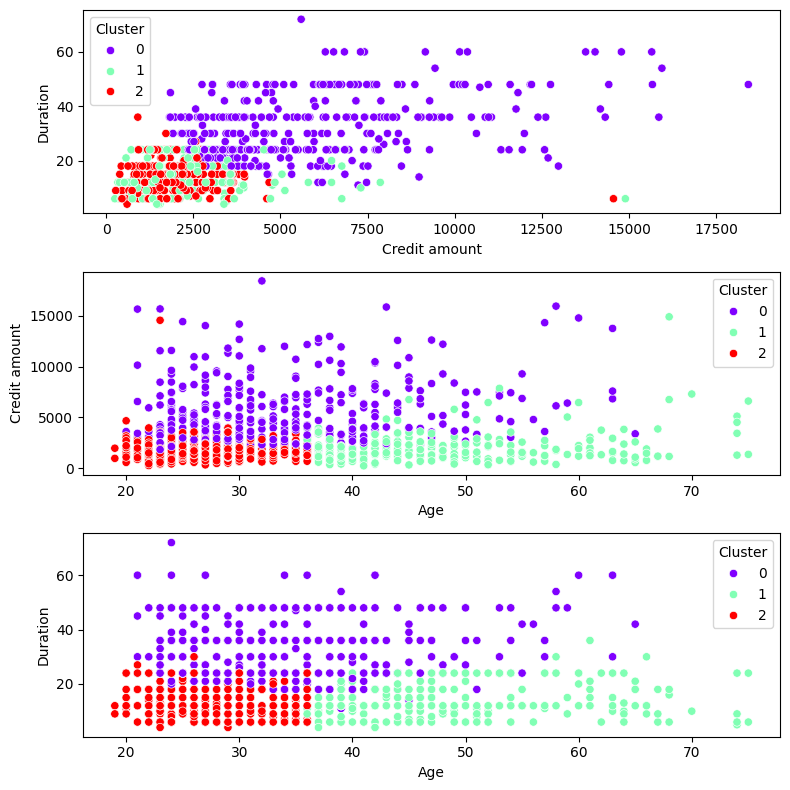

In [ ]:
## Plot clustered data
scatter_plot(clustered_data, 'Cluster')

In [ ]:
grouped_km = clustered_data.groupby(['Cluster']).mean().round(1)
grouped_km

,Age,Credit amount,Duration
Cluster,,,
0,34.0,5671.2,32.3
1,48.9,1988.3,14.0
2,27.9,1733.0,14.2


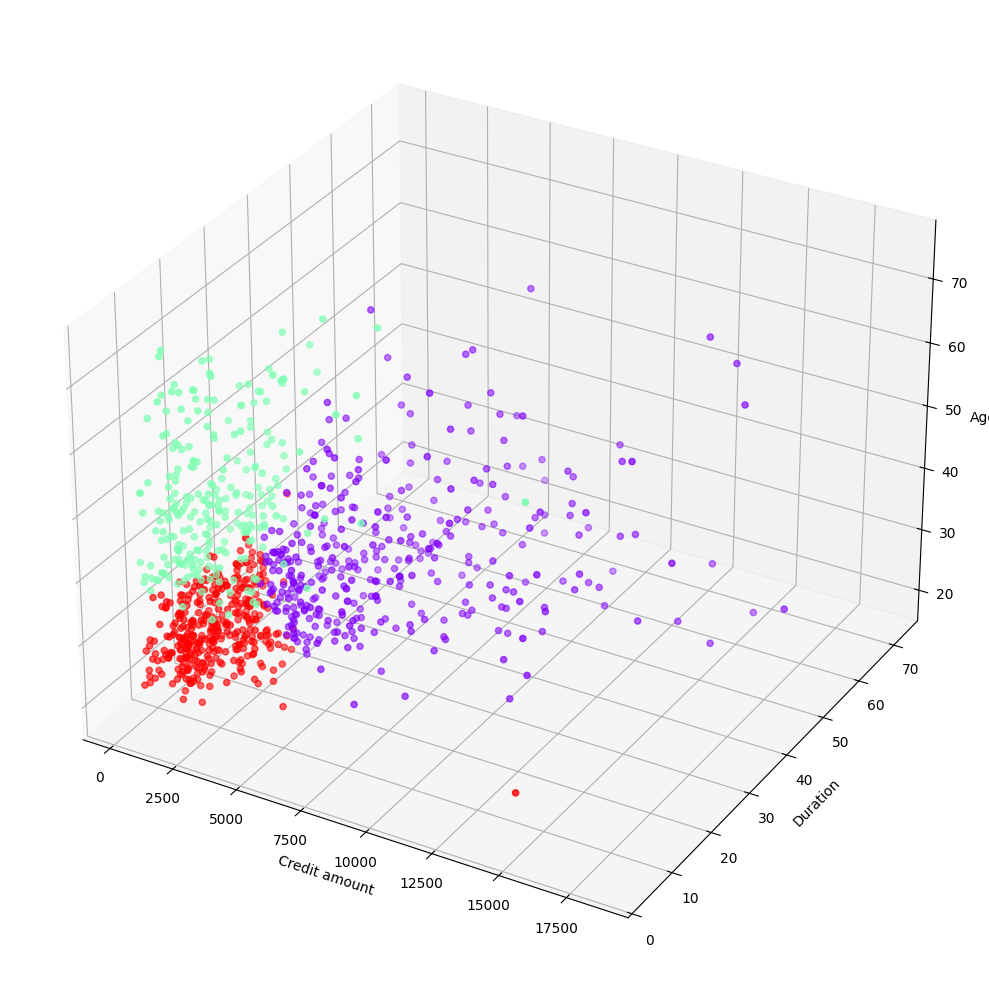

In [ ]:
_3d_data_plot(clustered_data, labels=final_kmeans.labels_)

<Figure size 2000x1000 with 0 Axes>

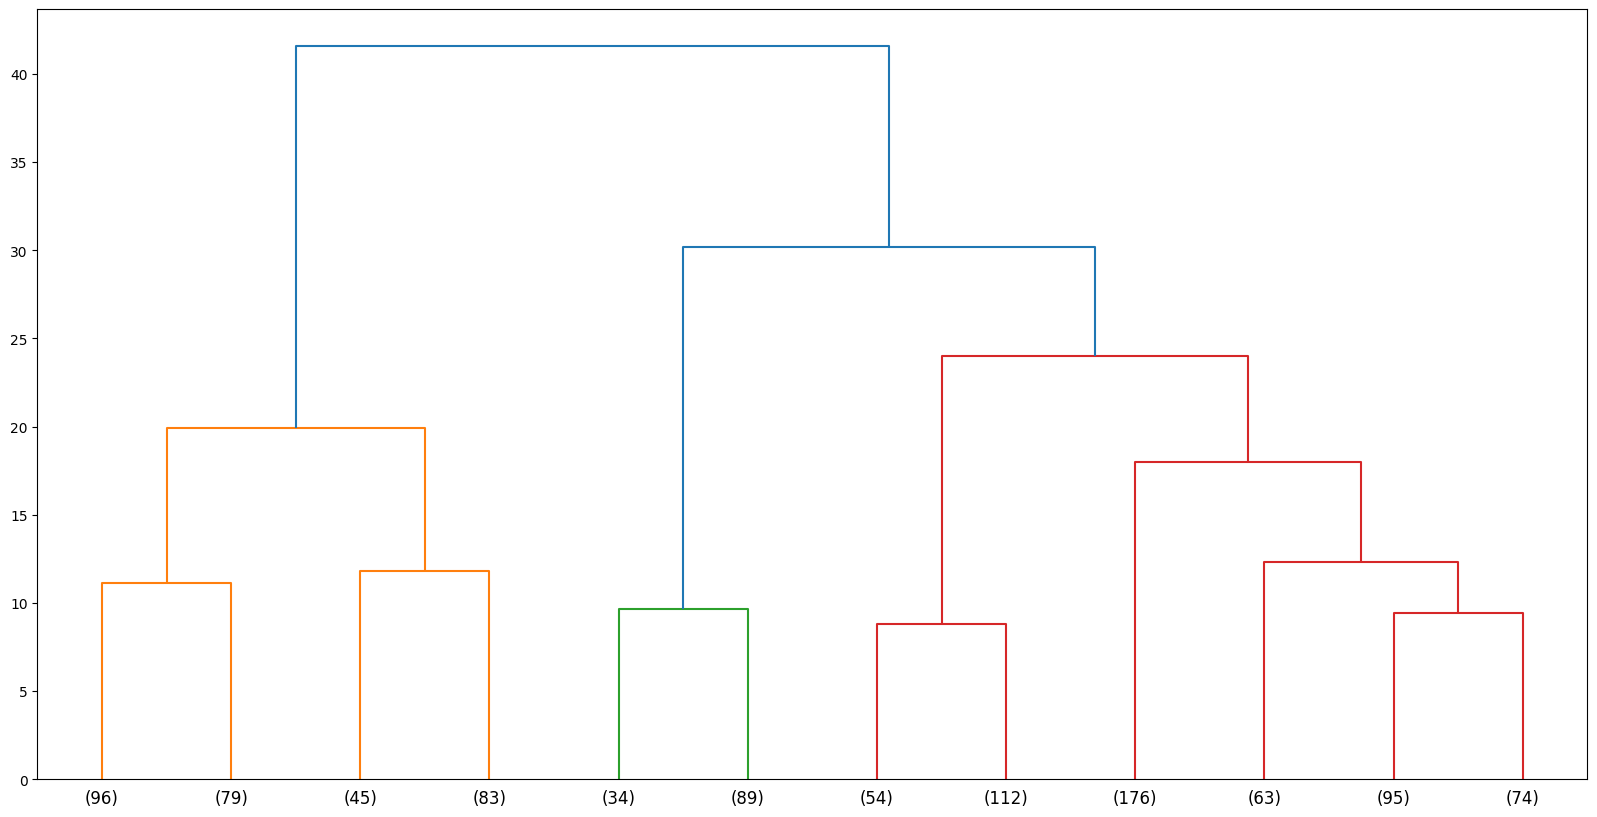

In [ ]:
### Ex-3-Task-1
plt.figure(figsize=(20, 10))

linkage_method = None

### BEGIN SOLUTION
# your code here
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
linkage_method = 'ward'
Z = linkage(scaled_data, method=linkage_method)
dendrogram(Z, truncate_mode='lastp', p=12)
plt.show()

### END SOLUTION

In [ ]:

hac_model = None
hac_labels = None


from sklearn.cluster import AgglomerativeClustering
hac_model = AgglomerativeClustering(n_clusters=4, linkage='ward')
hac_labels = hac_model.fit_predict(scaled_data)



In [ ]:
assert hac_model is not None
assert hac_labels is not None


          Age  Credit amount  Duration
Cluster                               
0        41.2         6077.0      31.7
1        30.6         1838.5      13.5
2        51.1         1320.3      10.7
3        25.8         3117.1      26.9


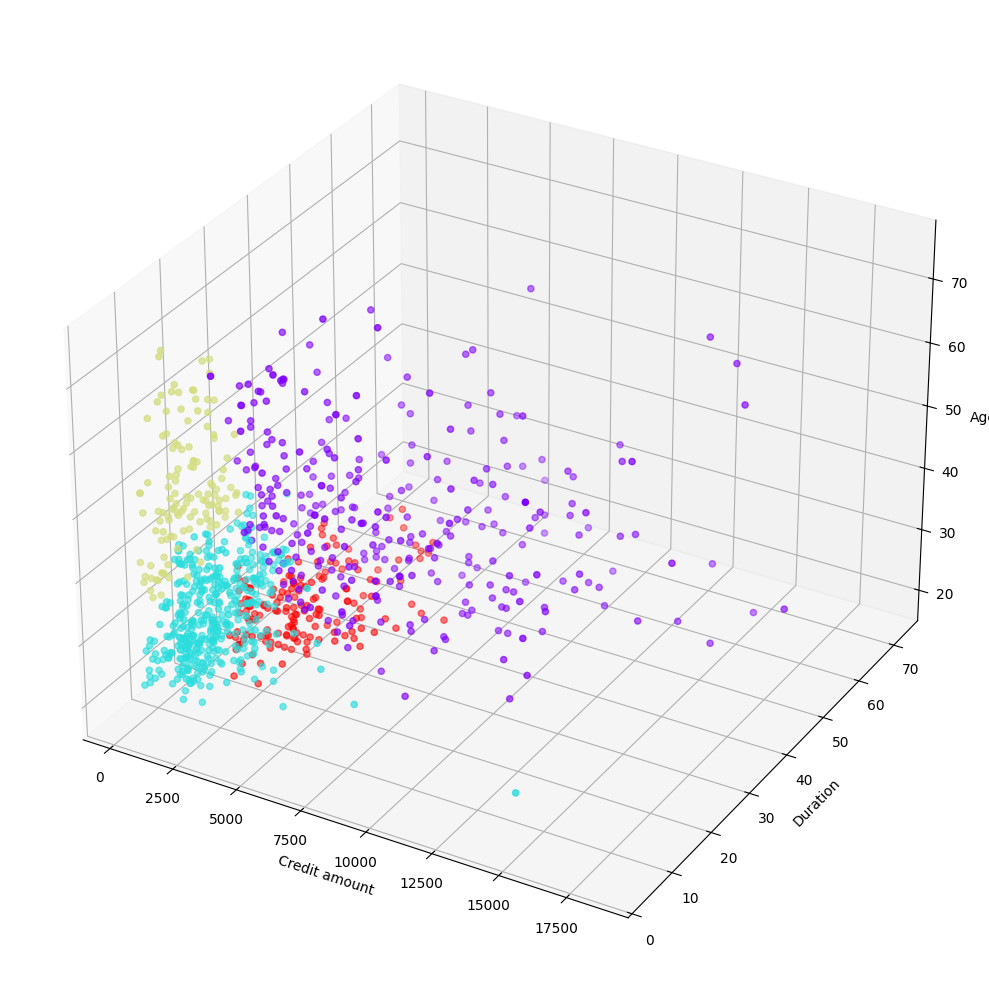

In [ ]:
df_clustered_hac = cluster_data.assign(Cluster=hac_labels)
grouped_hac = df_clustered_hac.groupby(['Cluster']).mean().round(1)
print(grouped_hac)
_3d_data_plot(cluster_data, labels=hac_labels)

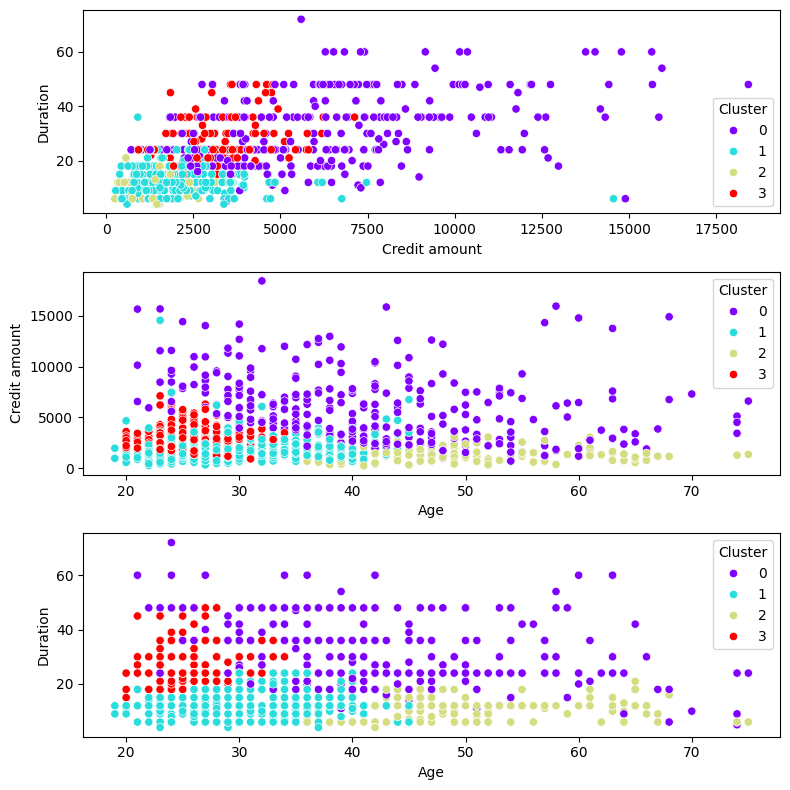

In [ ]:
scatter_plot(df_clustered_hac, 'Cluster')

In [ ]:
!pip install kmodes

In [ ]:

from kmodes.kprototypes import KPrototypes

kp_labels = None
categorical_indexes = []


df_filled = df.copy()
df_filled['Saving accounts'] = df_filled['Saving accounts'].fillna('unknown')
df_filled['Checking account'] = df_filled['Checking account'].fillna('unknown')


categorical_cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
categorical_indexes = [df_filled.columns.get_loc(col) for col in categorical_cols]

kp = KPrototypes(n_clusters=4, init='Huang', random_state=42)
kp_labels = kp.fit_predict(df_filled, categorical=categorical_indexes)


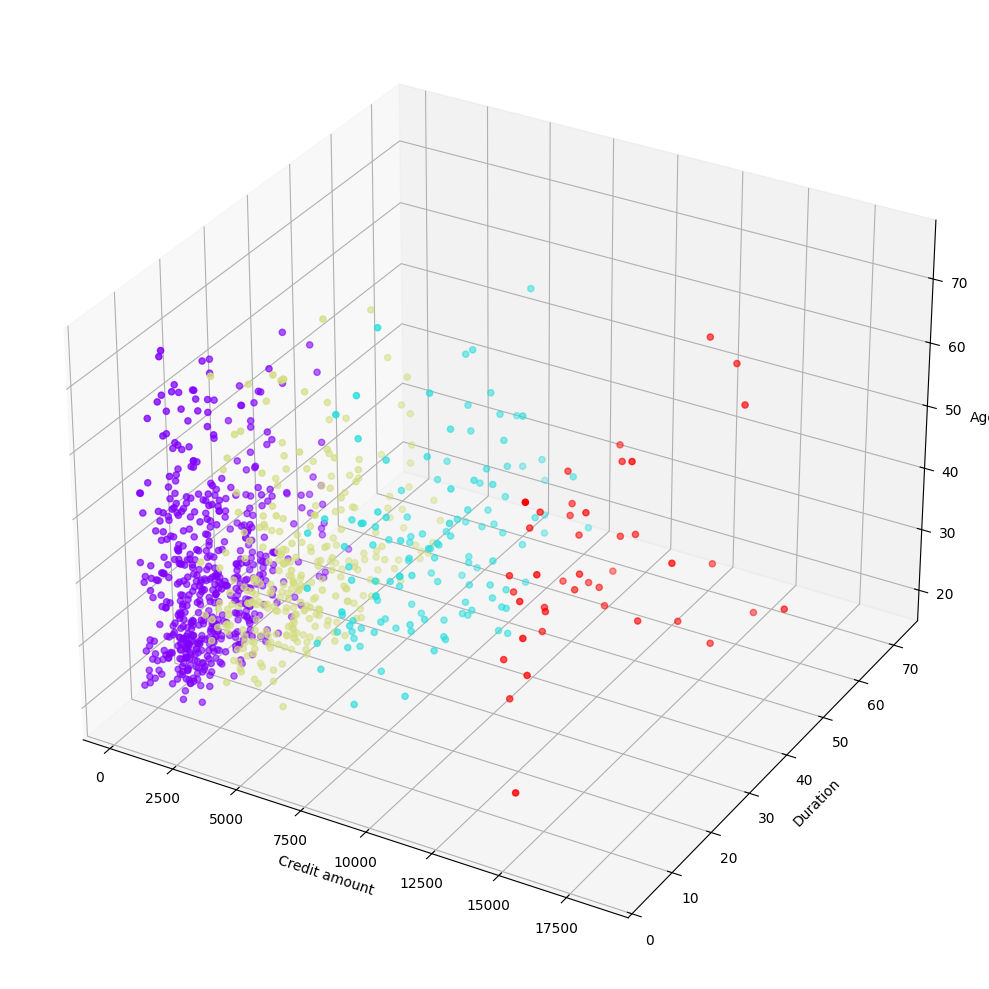

In [ ]:
kp_assigned = df.assign(Cluster=kp_labels)
_3d_data_plot(df, kp_labels)

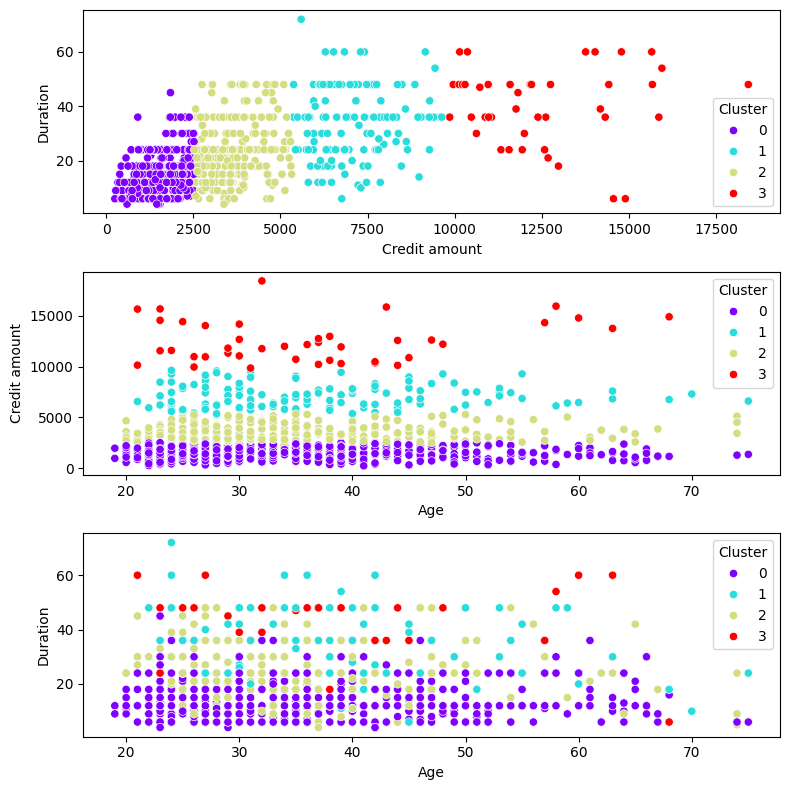

In [ ]:
scatter_plot(kp_assigned, 'Cluster')

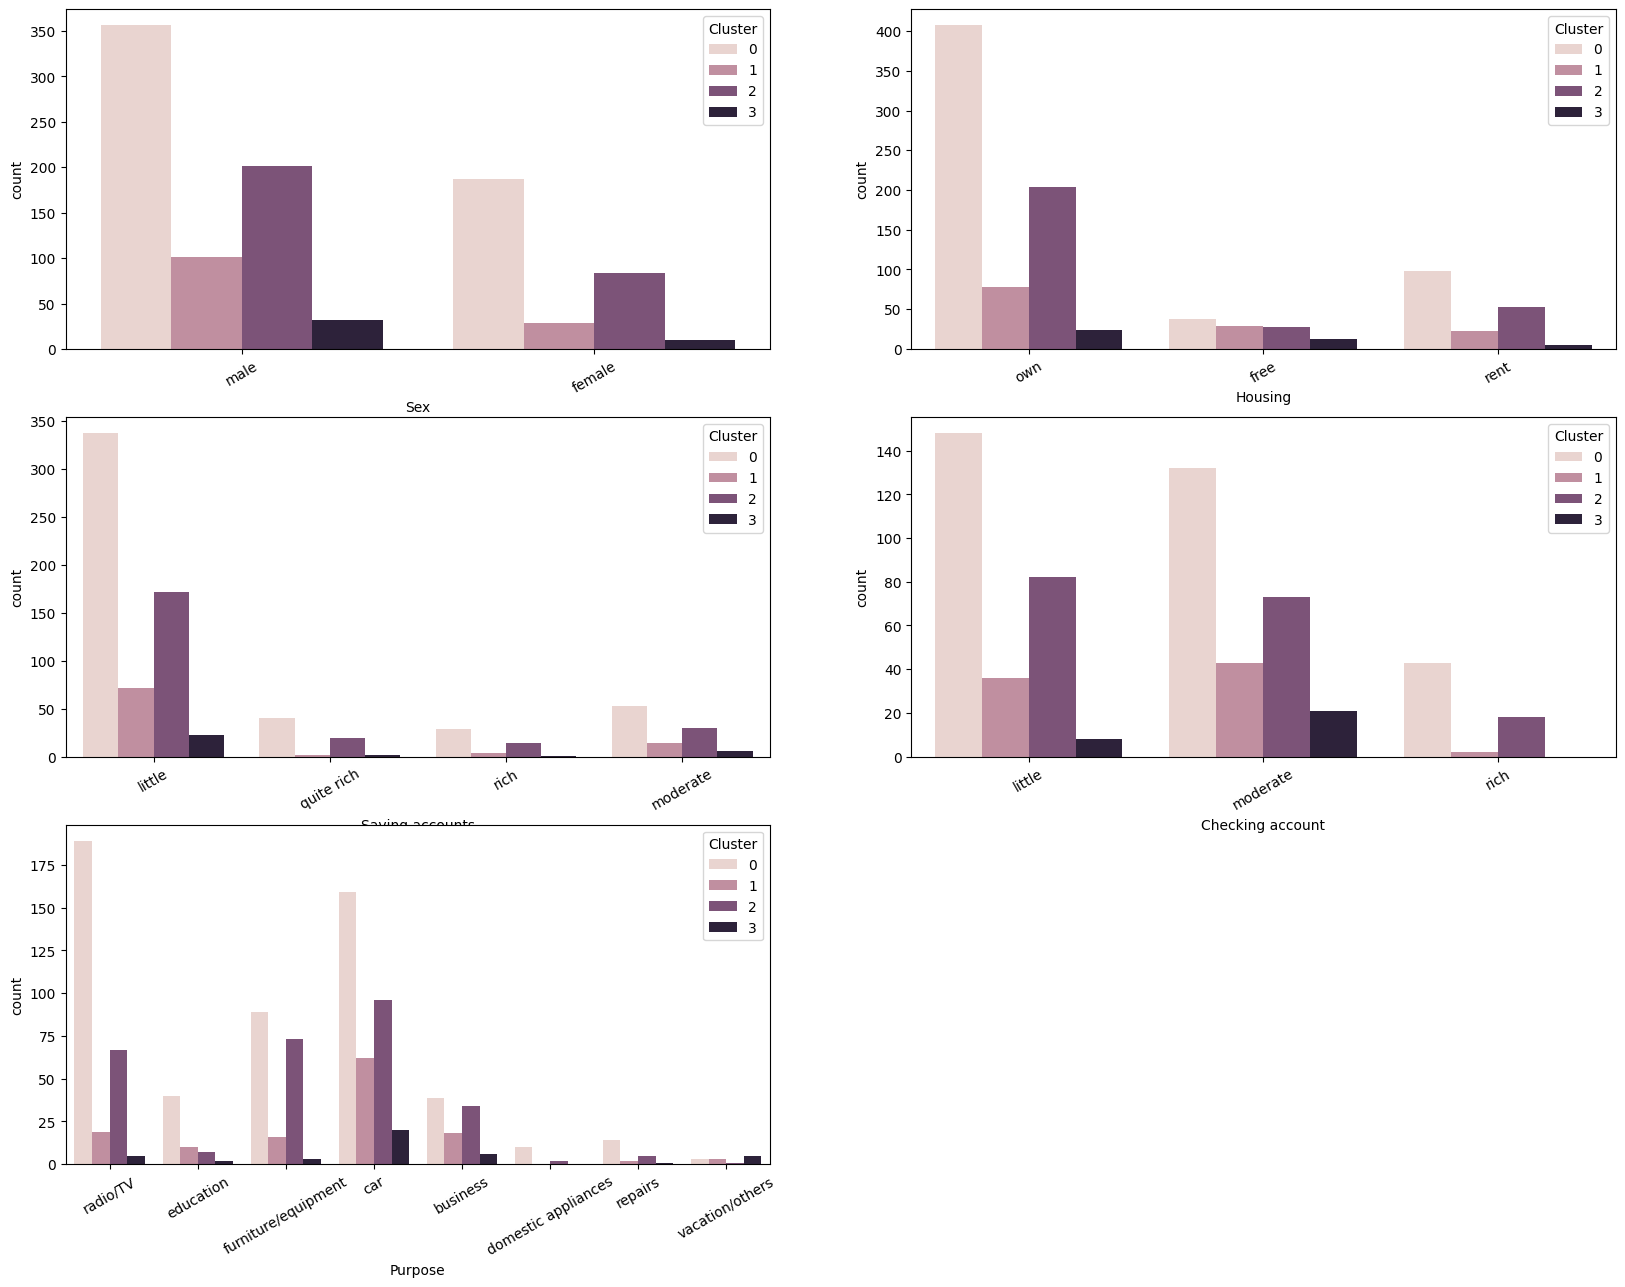

In [ ]:
fig = plt.figure(figsize = (20,15))
axes = 320
for cat in df.columns[categorical_indexes]:
    axes += 1
    fig.add_subplot(axes)
    sns.countplot(data = kp_assigned, hue=kp_assigned['Cluster'], x = cat)
    plt.xticks(rotation=30)
plt.show()